# Intro to Statistics - The Organic Chemistry Tutor - Lesson 01
YouTube - [Introduction to Statistics](https://youtu.be/XZo4xyJXCak?si=cbuSKSl20ERRs63s)

What are the mean, median, mode, and range? 
- The mean is the average of all of the numbers.
- The median is the middle number of the sorted list.
- The mode is the the number that appears the most.
- The range is the difference between the largest number and the smallest number.

1. Find the mean, median, mode, and range of the following dataset. 10, 7, 14, 23, 15, 7, 32
    - There are a couple of different ways to approach this problem. 
        - First, I could just perform the actions. For example, to find the mean, I could just add up all of the numbers and divide by the length of the list.
        - I could use the statistics library to use the statistics methods that are baked in. Let's use this one since the data set is small and should be easy to perform operations on. (Later I might want to use NumPy or SciPi)

In [73]:
#import statistics library
from statistics import mean, median, mode

# create a list of the dataset of numbers.
dataset = [10, 7, 14, 23, 15, 7, 32]

# sort the numbers using the sorted() method.
dataset = sorted(dataset)

# display the sorted dataset
print('Here is the sorted dataset:', dataset)

# Find the Mean, Meadian and Mode
print('The mean is:', round(mean(dataset), 2)) # I use the round method here to round to 2 decimal spots for easy reading.
print('The median is:', median(dataset))
print('The mode is:', mode(dataset))

# find the range of the dataset
print('The range is:', dataset[len(dataset) - 1] - dataset[0])

Here is the sorted dataset: [7, 7, 10, 14, 15, 23, 32]
The mean is: 15.43
The median is: 14
The mode is: 7
The range is: 25


2. Find the mean, median, mode and range of the following dataset: 15, 21, 59, 15, 37, 59, 11, 41
    - I will apply the same techniques here as I did above to find the values, however, this problem is a little different than the first problem. 
        - This problem has 8 numbers in the dataset. The median will be calculated by finding the mean of the two numbers in the middile since there isn't a 'middle number'
        - This dataset is 'bimodal' meaning there are 2 numbers (15 and 59) that would qualify for the number that appears most often. Python has a built in method called 'multimode' in the statistics library to handle this situation.

In [74]:
# import the multimode method from statistics
from statistics import multimode

# create a list of the dataset of numbers
dataset = [15, 21, 59, 15, 37, 59, 11, 41]

# sort the dataset
dataset = sorted(dataset)

# display the sorted list
print('Here is the sorted list:', dataset)

# find the mean, median, and mode
print('The mean is:', round(mean(dataset), 2)) # use the round method to round to 2 decimal places.
print('The median is:', median(dataset))
print('The mode is:', multimode(dataset))

# find the range of the dataset
print('The range is:', dataset[len(dataset) - 1] - dataset[0])

Here is the sorted list: [11, 15, 15, 21, 37, 41, 59, 59]
The mean is: 32.25
The median is: 29.0
The mode is: [15, 59]
The range is: 48


## Finding the quartiles and the interquartile range. 
- Quartiles are a division of observations in four defined intervals based on the values of the data and how they compare to the entire set of observations.
- The smallest value is the min and the largest value is the max. Values in between are Q1, Q2, and Q3.
- How do we find Q1, Q2, Q3
    - Q2 is the mean of the entire dataset.
    - Q1 is the mean of the lower half of the dataset, not including Q2.
    - Q3 is the mean of the upper half of the dataset, not including Q2.
    - This means that the data must be sorted in order to find the quartiles.
- The Interquartile Range (IQR) is the distance between Q1 and Q3. 
`IQR = Q3 - Q1`

- Why is the IQR useful? 
    - It allows us to find whether or not a number is an outlier in the dataset or not. If the number is within the IQR, then the number is not an outlier. If it is NOT within the IQR, the number is an outlier.
`[Q1 - 1.5*IQR, Q3 + 1.5*IQR]`

Python has a quantiles method in statistics that allows the developer to divide the data set into n parts. We will use 4 for quartiles.

3. Find the quartiles and the Interquarile Range of the following dataset: 7, 11, 14, 5, 8, 27, 16, 10, 13, 17, 16.


In [75]:
# import the quantiles method from statistics
from statistics import quantiles

# create a list of the dataset.
dataset = [7, 11, 14, 5, 8, 27, 16, 10, 13, 17, 16]

# sort the dataset
dataset = sorted(dataset)
print('Here is the sorted dataset:', dataset)

# create an empty list to hold quantile values
quarts = []

# find the quartiles
for q in quantiles(dataset, n = 4):
    quarts.append(round(q, 2)) # add the quantiles to the empty list as the loop iterates.

# check to see if values appended correctly.
print('Here are the quantiles:', quarts)

# Find the IQR 
iqr = quarts[len(quarts) - 1] - quarts[0]

print('Here is the IQR:', iqr)


Here is the sorted dataset: [5, 7, 8, 10, 11, 13, 14, 16, 16, 17, 27]
Here are the quantiles: [8.0, 13.0, 16.0]
Here is the IQR: 8.0


4. Find any outliers in the previous dataset.
    - Recall above that outliers are defined by any number that is outside the IQR. `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]`

In [76]:
# for simplicity I will define q1, q2, and q3 values.
q1 = quarts[0]
q2 = quarts[1]
q3 = quarts[2]

# setup formulas for min_IQR_value and max_IQR_value
min_IQR_value = q1 - (1.5 * iqr)
max_IQR_value = q3 + (1.5 * iqr)

# print these values to see them for better understanding.
print('The minimum IQR value is:', min_IQR_value)
print('The maximum IQR value is:', max_IQR_value)

# setup an empty list for any outliers.
outliers = []

# determine whether or not there are any outliers.
for number in dataset:
    if number < min_IQR_value:
        outliers.append(number)
    if number > max_IQR_value:
        outliers.append(number)

if len(outliers) > 0:
    print('Here are the outliers:', outliers)
else:
    print('There are no outliers in this dataset.')

The minimum IQR value is: -4.0
The maximum IQR value is: 28.0
There are no outliers in this dataset.


*We can see that there are no outliers in this dataset because none of the numbers in the dataset are less than -4 or greater than 28.*

## Box and Whisker Plot
A box and whisker plot, also known as simply a box plot, is a method for demonstrating graphically the locality, spread, and skewness groups of numerical data through their quartiles. We can create a box and whisker plot using matplotlib. Matplotlib is a Python library for creating static, animated, and interactive vizualizations in Python. We can install matplotlib using pip.

5. Find the q1, q2, q3, and IQR of the following dataset, identify any outliers, and create a box and whisker plot. 16, 18, 28, 13, 50, 31, 25, 22, 18, 23, 29, 38

Here is the sorted dataset: [13, 16, 18, 18, 22, 23, 25, 28, 29, 31, 38, 50]
Here are the quartiles: [18.0, 24.0, 30.5]
Here is the IQR: 12.5
Here are the outliers: [50]


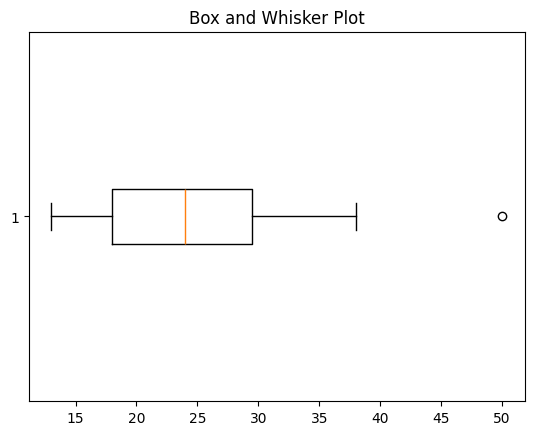

In [77]:
# import matplotlib as plt (for simplicity of typing)
import matplotlib.pyplot as plt

#import statistics library
from statistics import mean, median, mode

# import the quantiles method from statistics
from statistics import quantiles

# create the dataset list
dataset = [16, 18, 28, 13, 50, 31, 25, 22, 18, 23, 29, 38]

# sort the dataset. This step isn't necessary for matplotlib, but to find the values the way that we did before, it is.
dataset = sorted(dataset)

print('Here is the sorted dataset:', dataset)

# go ahead and setup the quartlies list that we will need.
quartiles = []

# find the quartiles
for q in quantiles(dataset, n=4):
    quartiles.append(q)

print('Here are the quartiles:', quartiles)

# initialize q1, q2, q3 for simplicity
q1 = quartiles[0]
q2 = quartiles[1]
q3 = quartiles[2]

# find IQR
iqr = q3 - q1

print('Here is the IQR:', iqr)

# find the min_IQR value and max_IQR value
min_IQR = q1 - (1.5 * iqr)
max_IQR = q3 + (1.5 * iqr)

# find any outliers
outliers = []
for number in dataset:
    if number < min_IQR:
        outliers.append(number)
    if number > max_IQR:
        outliers.append(number)

if len(outliers) > 0:
    print('Here are the outliers:', outliers)
else:
    print('There are no outliers')

plt.boxplot(dataset, vert=False)
plt.title('Box and Whisker Plot')
plt.show()


*note: The `statistics.quantiles` function in Python uses the exclusive method to calculate quartiles, which excludes the median when dividing the dataset into lower and upper halves. This can result in slightly different values than expected, particularly if you're used to the inclusive method (which includes the median in both halves). To calculate quartiles using the inclusive method, use NumPy's `percentile` function with the appropriate interpolation setting ("linear" or "midpoint") or manually compute the quartiles by including the median in the split halves.*

## What did I learn? 
In this lesson, I revisited foundational statistical concepts such as mean, median, mode, and range, and learned how to calculate each of these using Python’s statistics library. Prior to this lesson, I was unaware of the existence of this library, and discovering it is valuable because it simplifies my code, making it more readable and efficient. Additionally, I gained a deeper understanding of quantiles, particularly quartiles. While I was familiar with the basic idea of dividing data into quarters to analyze its distribution, I was not aware of the specific terminology and more detailed study behind these concepts. Understanding quantiles is important because they help identify outliers and analyze the overall distribution of a dataset, which will enhance my ability to interpret data and make more informed projections.

## What's Next?
This lesson serves as a strong foundation for applying these statistical principles to the analysis of baseball statistics and other datasets. For my first project, I plan to download a set of baseball statistics from the 2024 season, select a particular statistic, and calculate the relevant statistical measures. This will allow me to rank players based on the chosen stat and gain more comprehensive insights into their performance.